# Explorative Information Visualization
### Libraries loading

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dataset loading
The fisrt dataset is "Food prices for nutrition"

In [2]:
# source: https://databank.worldbank.org/source/food-prices-for-nutrition
diet_cost = pd.read_csv("./datasets/P_Data_Extract_From_Food_Prices_for_Nutrition/diet_cost.csv", sep=",")
diet_cost = diet_cost[diet_cost["Classification Code"] == "FPN 2.0"]
diet_cost = diet_cost.drop(columns=["Classification Name", "Classification Code", "Time", "Time Code"])
diet_cost.rename(columns={'Country Name': 'Country'}, inplace=True)
diet_cost = diet_cost[~diet_cost.apply(lambda row: row.astype(str).str.contains(r'\.\.').any(), axis=1)]
np.sort(diet_cost["Country"].unique())

array(['Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Rep.',
       'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica',
       'Croatia', 'Curacao', 'Cyprus', 'Czechia', "Côte d'Ivoire",
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Rep.',
       'East Asia & Pacific', 'Ecuador', 'Egypt', 'Eq. Guinea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Europe & Central Asia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'High income', 'Honduras', 'H

And the second one is "Income by country", which is approximated using the GNI per capita

In [3]:
# source: https://www.kaggle.com/datasets/frankmollard/income-by-country
income_by_country = pd.read_csv("./datasets/Income by Country.csv", sep=";")
income_by_country

,Country,Income
0,Afghanistan,1746
1,Albania,12300
2,Algeria,13639
3,Andorra,48641
4,Angola,5555
...,...,...
186,Venezuela,9070
187,Vietnam,6220
188,Yemen,1433
189,Zambia,3582


We have to merge the two datasets into one. We will lose some rows. Note that i have adjusted the country names manually to perform the join

In [4]:
income_and_diet = pd.merge(income_by_country, diet_cost, how="inner", on="Country") # we can get more data later
income_and_diet['Income'] = income_and_diet['Income'].astype(float)
income_and_diet['Cost of a healthy diet [CoHD]'] = income_and_diet['Cost of a healthy diet [CoHD]'].astype(float)

income_and_diet["Income/Minute"] = income_and_diet["Income"] / 525600
income_and_diet["Required Time"] = income_and_diet["Cost of a healthy diet [CoHD]"] / income_and_diet["Income/Minute"]
income_and_diet["Required Time Log"] = np.log(income_and_diet["Cost of a healthy diet [CoHD]"] / income_and_diet["Income/Minute"])
income_and_diet

,Country,Income,Country Code,Cost of a healthy diet [CoHD],Income/Minute,Required Time,Required Time Log
0,Albania,12300.0,ALB,4.280,0.023402,182.891707,5.208894
1,Algeria,13639.0,DZA,3.760,0.025949,144.897426,4.976026
2,Angola,5555.0,AGO,4.585,0.010569,433.821062,6.072632
3,Antigua and Barbuda,22201.0,ATG,4.504,0.042239,106.630440,4.669369
4,Armenia,9277.0,ARM,3.247,0.017650,183.962833,5.214734
...,...,...,...,...,...,...,...
137,United Kingdom,39507.0,GBR,1.911,0.075166,25.423889,3.235689
138,United States of America,56140.0,USA,3.383,0.106811,31.672690,3.455455
139,Uruguay,19435.0,URY,3.414,0.036977,92.328191,4.525350
140,Vietnam,6220.0,VNM,4.072,0.011834,344.090547,5.840905


Some basic visual analysis :) 

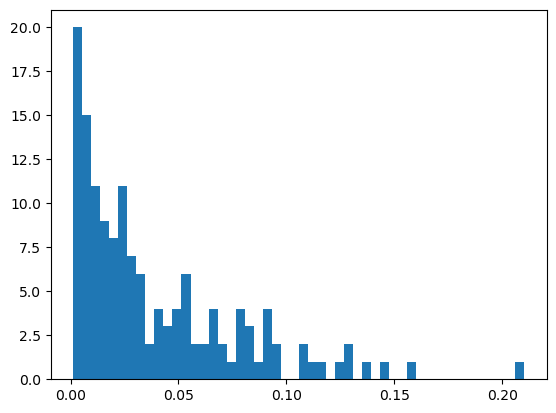

In [6]:
plt.hist(income_and_diet['Income/Minute'], bins=50)
plt.show()

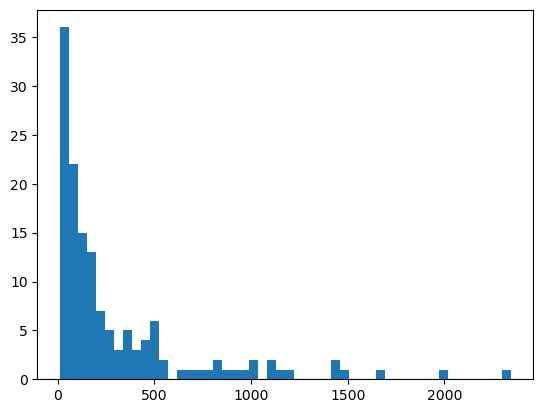

In [7]:
plt.hist(income_and_diet['Required Time'], bins=50)
plt.show()

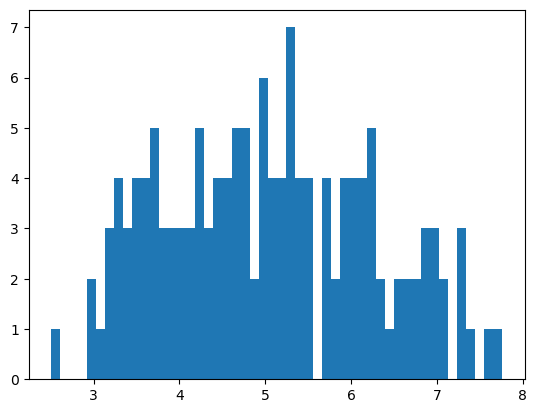

In [8]:
plt.hist(income_and_diet['Required Time Log'], bins=50)
plt.show()

I will now add the 2-digits ISO country codes (gpt generated!)

In [5]:
income_and_diet

,Country,Income,Country Code,Cost of a healthy diet [CoHD],Income/Minute,Required Time,Required Time Log
0,Albania,12300.0,ALB,4.280,0.023402,182.891707,5.208894
1,Algeria,13639.0,DZA,3.760,0.025949,144.897426,4.976026
2,Angola,5555.0,AGO,4.585,0.010569,433.821062,6.072632
3,Antigua and Barbuda,22201.0,ATG,4.504,0.042239,106.630440,4.669369
4,Armenia,9277.0,ARM,3.247,0.017650,183.962833,5.214734
...,...,...,...,...,...,...,...
137,United Kingdom,39507.0,GBR,1.911,0.075166,25.423889,3.235689
138,United States of America,56140.0,USA,3.383,0.106811,31.672690,3.455455
139,Uruguay,19435.0,URY,3.414,0.036977,92.328191,4.525350
140,Vietnam,6220.0,VNM,4.072,0.011834,344.090547,5.840905


In [6]:
import pycountry

def iso2_to_iso3(iso2_code):
    if iso2_code is None or not iso2_code.strip():
        return None
    try:
        return pycountry.countries.get(alpha_2=iso2_code).alpha_3
    except AttributeError:
        return None

def iso3_to_iso2(iso3_code):
    if iso3_code is None or not iso3_code.strip():
        return None
    try:
        return pycountry.countries.get(alpha_3=iso3_code).alpha_2
    except AttributeError:
        return None

def iso2_to_country_name(iso2_code):
    if iso2_code is None or not iso2_code.strip():
        return None
    try:
        country = pycountry.countries.get(alpha_2=iso2_code)
        return country.name
    except AttributeError:
        return None

In [7]:
income_and_diet["Country"] = income_and_diet["Country Code"].apply(iso3_to_iso2)
income_and_diet["Display Country Name"] = income_and_diet["Country"].apply(iso2_to_country_name)
income_and_diet

,Country,Income,Country Code,Cost of a healthy diet [CoHD],Income/Minute,Required Time,Required Time Log,Display Country Name
0,AL,12300.0,ALB,4.280,0.023402,182.891707,5.208894,Albania
1,DZ,13639.0,DZA,3.760,0.025949,144.897426,4.976026,Algeria
2,AO,5555.0,AGO,4.585,0.010569,433.821062,6.072632,Angola
3,AG,22201.0,ATG,4.504,0.042239,106.630440,4.669369,Antigua and Barbuda
4,AM,9277.0,ARM,3.247,0.017650,183.962833,5.214734,Armenia
...,...,...,...,...,...,...,...,...
137,GB,39507.0,GBR,1.911,0.075166,25.423889,3.235689,United Kingdom
138,US,56140.0,USA,3.383,0.106811,31.672690,3.455455,United States
139,UY,19435.0,URY,3.414,0.036977,92.328191,4.525350,Uruguay
140,VN,6220.0,VNM,4.072,0.011834,344.090547,5.840905,Viet Nam


The dataset is complete

In [21]:
income_and_diet.to_csv("explorative_dataset.csv")

### Basic plotting

In [11]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

research_data = world.merge(income_and_diet, left_on='name', right_on='Country', how='left')
research_data = research_data.dropna(subset=['Income'])
research_data = research_data.dropna(subset=['Cost of a healthy diet [CoHD]'])
research_data['Income'] = research_data['Income'].astype(float)
research_data['Cost of a healthy diet [CoHD]'] = research_data['Cost of a healthy diet [CoHD]'].astype(float)

C:\Users\Andrea\AppData\Local\Temp\ipykernel_22844\1162797538.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


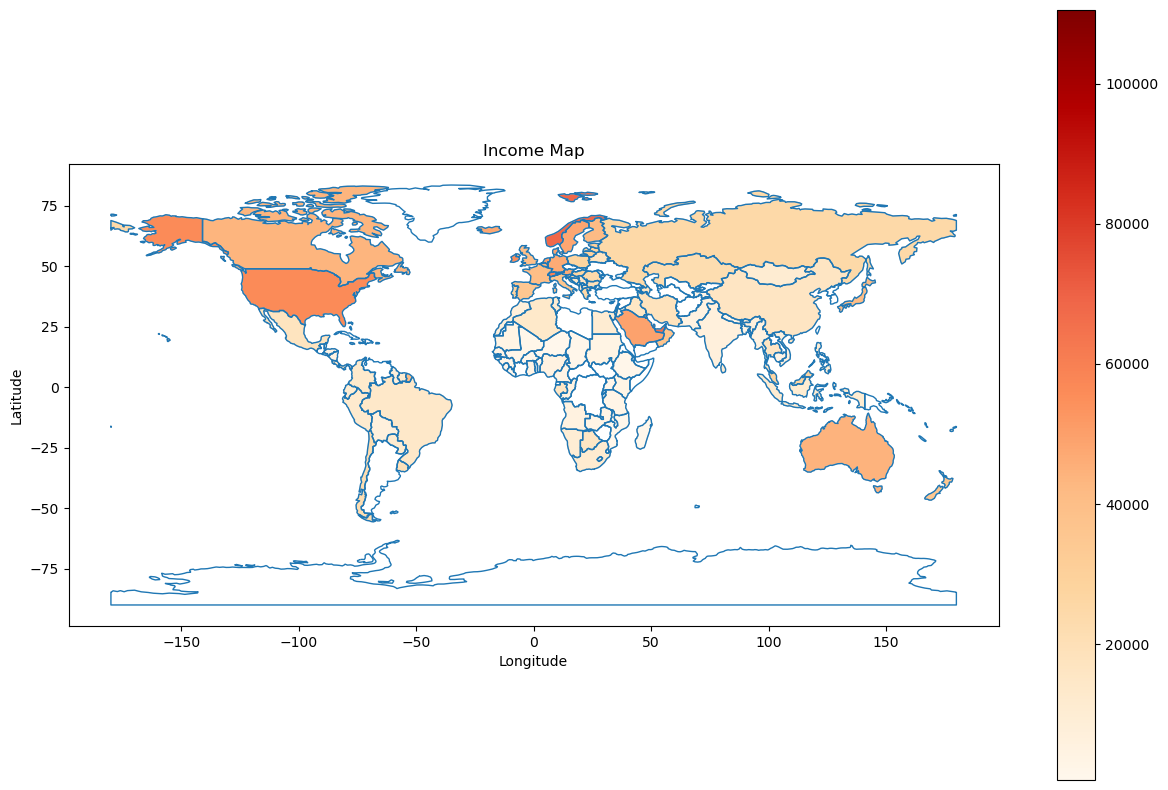

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world.boundary.plot(ax=ax, linewidth=1)

research_data.plot(column='Income', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('Income Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

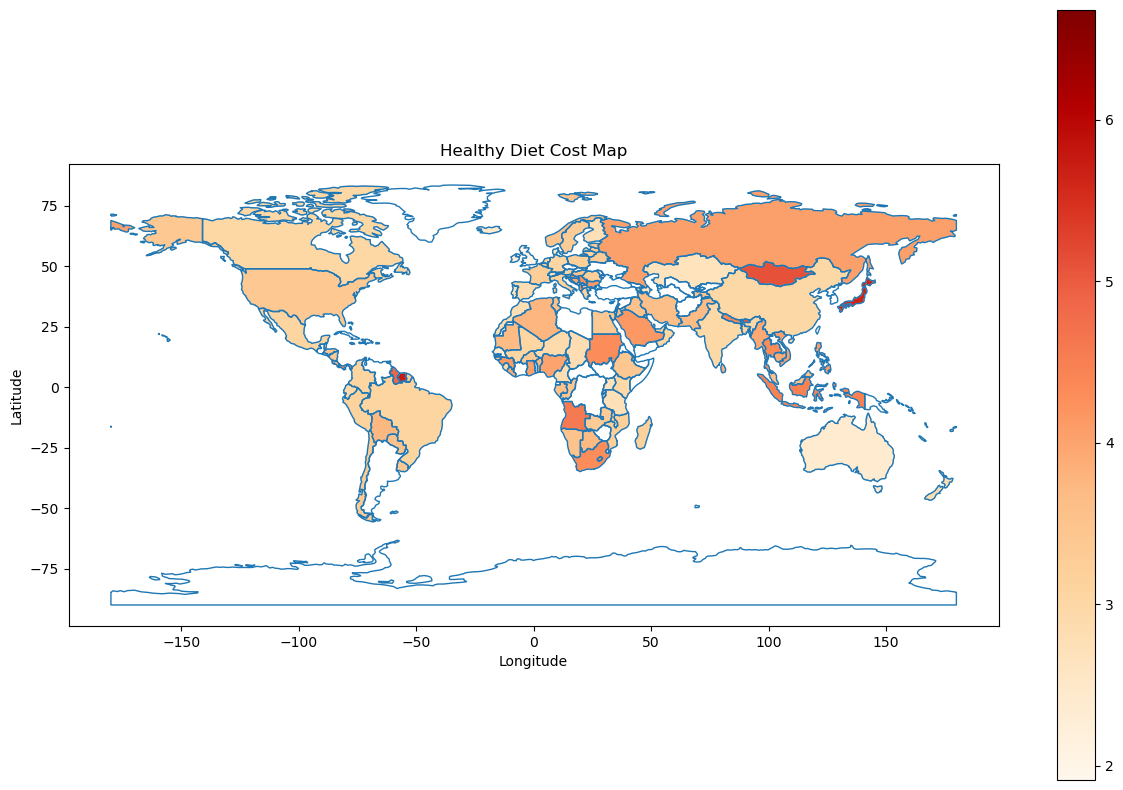

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world.boundary.plot(ax=ax, linewidth=1)

research_data.plot(column='Cost of a healthy diet [CoHD]', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('Healthy Diet Cost Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

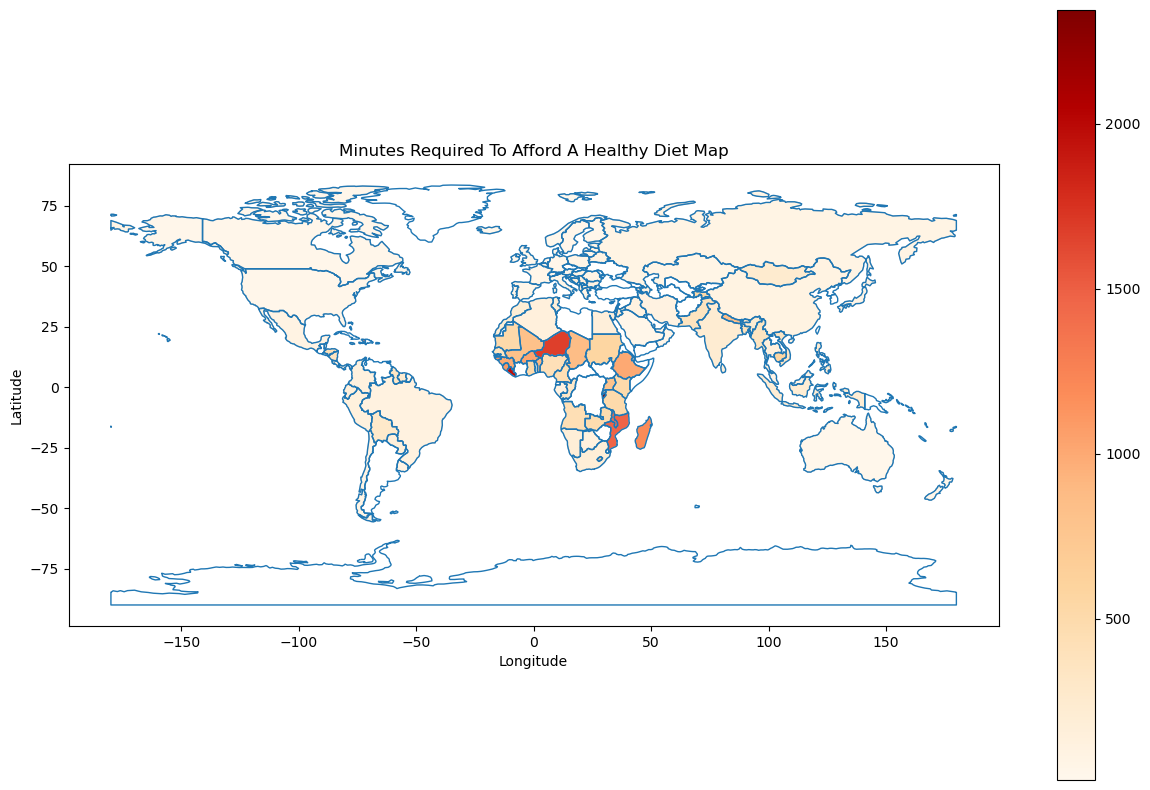

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world.boundary.plot(ax=ax, linewidth=1)

research_data.plot(column='Required Time', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('Minutes Required To Afford A Healthy Diet Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

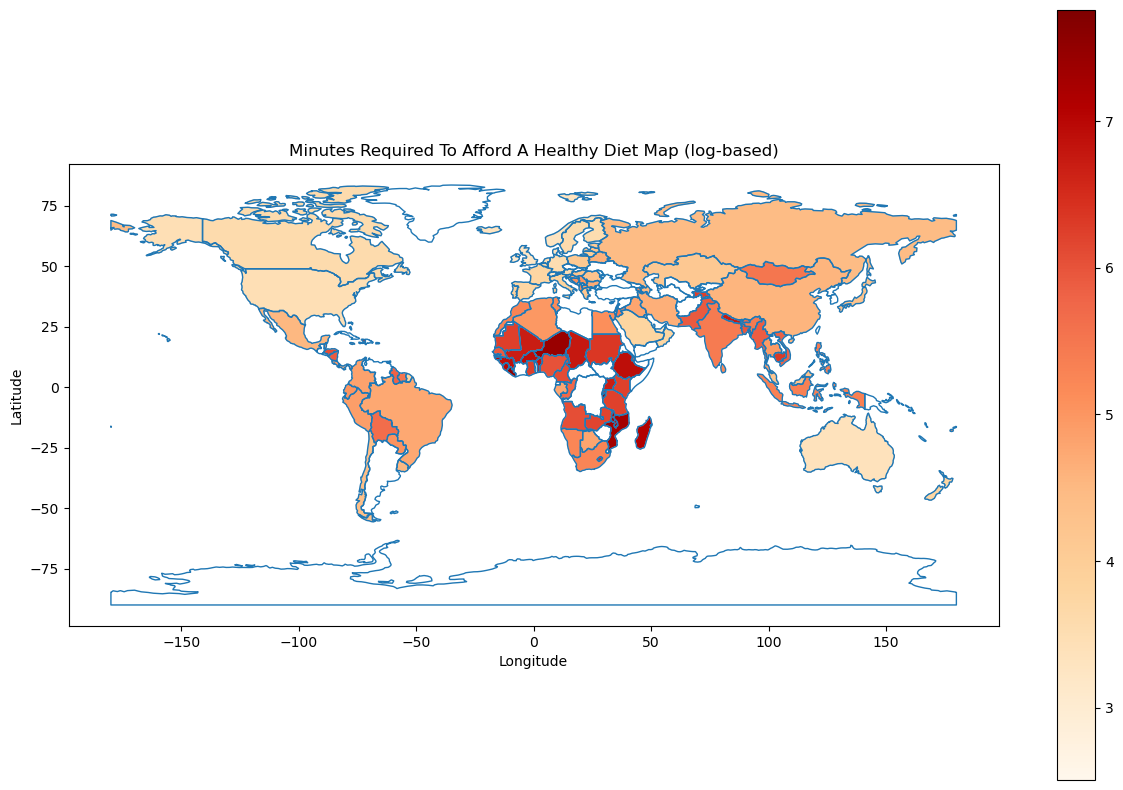

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world.boundary.plot(ax=ax, linewidth=1)

research_data.plot(column='Required Time Log', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('Minutes Required To Afford A Healthy Diet Map (log-based)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()